In [2]:
%pwd

'C:\\Users\\Zachary Ohl\\Desktop\\new job folder\\Kenco'

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import random
import seaborn as sns




In [19]:
train = pd.read_csv('https://raw.githubusercontent.com/ZachOhl/kenco/main/interview_train_data.csv')
train.tail()

,ActualShip,KEY_LOAD_TRACKING,CreateDate,ActualDelivery,Carrier,ConsigneeCity,ConsigneeCountry,ConsigneeZip,DetailCity,DetailState,...,av_dow,AS_dow,EST_AV,holiday_flag,new_EST_AV,new_EST_AV_dow,Final_EST_AV,Final_EST_AV_dow,target,target_numerical
8995,2019-12-03 00:00:00.000,9916608512,2019-12-04 07:03,2019-12-09 00:00:00.000,4,SHEBOYGAN,NaN,53081,DUNCAN,SC,...,Thursday,Tuesday,2019-12-05 00:00:00.000,False,2019-12-05 00:00:00.000,Thursday,2019-12-05 00:00:00.000,Thursday,positive,1
8996,2019-12-03 00:00:00.000,9916608424,2019-12-04 07:03,2019-12-10 00:00:00.000,4,APPLE VALLEY,NaN,92307,APPLE VALLEY,CA,...,Friday,Tuesday,2019-12-06 00:00:00.000,False,2019-12-06 00:00:00.000,Friday,2019-12-06 00:00:00.000,Friday,positive,1
8997,2019-12-03 00:00:00.000,9916608466,2019-12-04 07:03,2019-12-05 00:00:00.000,4,MIAMITOWN,NaN,45041,DUNCAN,SC,...,Wednesday,Tuesday,2019-12-04 00:00:00.000,False,2019-12-04 00:00:00.000,Wednesday,2019-12-04 00:00:00.000,Wednesday,positive,1
8998,2019-12-03 00:00:00.000,9916608423,2019-12-04 07:03,2019-12-09 00:00:00.000,4,MARCY,NaN,13403,CARLISLE,PA,...,Friday,Tuesday,2019-12-06 00:00:00.000,False,2019-12-06 00:00:00.000,Friday,2019-12-06 00:00:00.000,Friday,positive,1
8999,2019-12-03 00:00:00.000,9916608420,2019-12-04 07:03,2019-12-05 00:00:00.000,4,LUGOFF,NaN,29078,DUNCAN,SC,...,Wednesday,Tuesday,2019-12-04 00:00:00.000,False,2019-12-04 00:00:00.000,Wednesday,2019-12-04 00:00:00.000,Wednesday,positive,1


In [486]:
#contains date/time and time-only vars:
datetime_cols = ['ActualShip', 'CreateDate', 'ActualDelivery', 'DetailCreateDate', 
                 'DetailDate', 'AV_CD', 'AV', 'RAD', 'Goal', 'Goal2', 'TargetShip_Early',
                'ActualDeliveryTime', 'ActualShipTime', 'AVTime', 'EST_AV', 'new_EST_AV',
                'Final_EST_AV']
#vars with only time of day (or duration?):    
timeonly_cols = ['ActualDeliveryTime', 'ActualShipTime', 'AVTime']
dateonly_cols = list(set(datetime_cols).difference(timeonly_cols))


In [18]:
test = pd.read_csv('https://raw.githubusercontent.com/ZachOhl/kenco/main/interview_test_data.csv')
test.head()

,ActualShip,KEY_LOAD_TRACKING,CreateDate,ActualDelivery,Carrier,ConsigneeCity,ConsigneeCountry,ConsigneeZip,DetailCity,DetailState,...,av_dow,AS_dow,EST_AV,holiday_flag,new_EST_AV,new_EST_AV_dow,Final_EST_AV,Final_EST_AV_dow,target,target_numerical
0,2019-12-03 00:00:00.000,99172562938,2019-12-04 07:02,2019-12-04 00:00:00.000,4,BROOKS,NaN,40109,BROOKS,KY,...,Wednesday,Tuesday,2019-12-04 00:00:00.000,False,2019-12-04 00:00:00.000,Wednesday,2019-12-04 00:00:00.000,Wednesday,positive,1
1,2019-12-03 00:00:00.000,9916608510,2019-12-04 07:03,2019-12-09 00:00:00.000,4,EDWARDSVILLE,NaN,62025,ARDEN,NC,...,Thursday,Tuesday,2019-12-05 00:00:00.000,False,2019-12-05 00:00:00.000,Thursday,2019-12-05 00:00:00.000,Thursday,positive,1
2,2019-12-03 00:00:00.000,9915539095,2019-12-04 07:04,2019-12-05 00:00:00.000,4,COLUMBUS,NaN,43228,BECKLEY,WV,...,Thursday,Tuesday,2019-12-05 00:00:00.000,False,2019-12-05 00:00:00.000,Thursday,2019-12-05 00:00:00.000,Thursday,positive,1
3,2019-12-03 00:00:00.000,9916608430,2019-12-04 07:05,2019-12-09 00:00:00.000,4,MENOMONIE,NaN,54751,DUNCAN,SC,...,Friday,Tuesday,2019-12-06 00:00:00.000,False,2019-12-06 00:00:00.000,Friday,2019-12-06 00:00:00.000,Friday,positive,1
4,2019-12-03 00:00:00.000,9916608428,2019-12-04 07:04,2019-12-09 00:00:00.000,4,OTTAWA,NaN,66067,ARDEN,NC,...,Friday,Tuesday,2019-12-06 00:00:00.000,False,2019-12-06 00:00:00.000,Friday,2019-12-06 00:00:00.000,Friday,positive,1


In [6]:
all(train.columns == test.columns)
#columns are same in train/test datasets

True

In [7]:
train.shape, test.shape

((9000, 61), (1478, 61))

In [501]:
train.target_numerical.value_counts(), test.target_numerical.value_counts()

(1    7293
 0    1707
 Name: target_numerical, dtype: int64,
 1    1033
 0     445
 Name: target_numerical, dtype: int64)

## make full dataset

In [487]:
fulldata = pd.concat([train, test], axis=0)  #all feature engineering s.b. done on the 
    #full dataset. Afterwards, resplit into train/test. 
    #Last index of train is 8999
first_test_ind = 9000
fulldata.shape

(10478, 61)

In [496]:
fulldata.iloc[:first_test_ind].index#, 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999],
           dtype='int64', length=9000)

In [497]:
fulldata.iloc[first_test_ind:].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477],
           dtype='int64', length=1478)

In [351]:
fulldata.nunique()

ActualShip                 172
KEY_LOAD_TRACKING        10476
CreateDate                2501
ActualDelivery             202
Carrier                      6
ConsigneeCity              847
ConsigneeCountry             2
ConsigneeZip              1123
DetailCity                 279
DetailState                 49
DetailCode                  10
DetailCodeDescription       10
DetailCreateDate          5617
DetailDate                8111
ShipperCity                219
ShipperState                44
ShipperZip                 313
ShipperCountry               2
AV_CD                     5555
AV                         236
PRO                      10476
DestCity                   790
DestState                   56
DestCtry                     5
DestZip                    997
OriginCity                 228
OriginState                 46
OriginCtry                   5
OriginZip                  242
Lane                      1228
ShipmentType                 6
CarrierMode                  1
ActualTr

In [55]:
fulldata[datetime_cols + ['target_numerical']].head(6)

,ActualShip,CreateDate,ActualDelivery,DetailCreateDate,DetailDate,AV_CD,AV,RAD,Goal,Goal2,TargetShip_Early,ActualDeliveryTime,ActualShipTime,AVTime,EST_AV,new_EST_AV,Final_EST_AV,target_numerical
0,2018-09-04 00:00:00.000,2018-09-05 08:23,2018-09-06 00:00:00.000,2018-09-05 08:23,09/05/2018 03:17,2018-09-06 09:16,2018-09-06 00:00:00.000,NaN,2018-06-01 00:00:00.000,2018-08-31 23:59:59.999,2018-08-30 08:00:00.000,13:48,16:57,07:46,2018-09-06 00:00:00.000,2018-09-06 00:00:00.000,2018-09-06 00:00:00.000,1
1,2019-02-06 00:00:00.000,2019-02-08 16:56,2019-02-08 00:00:00.000,2019-02-08 16:56,02/08/2019 11:00,2019-02-08 16:56,2019-02-08 00:00:00.000,NaN,2018-11-01 00:00:00.000,2019-01-31 23:59:59.999,2019-02-06 08:00:00.000,10:32,15:56,04:34,2019-02-07 00:00:00.000,2019-02-07 00:00:00.000,2019-02-07 00:00:00.000,0
2,2019-03-04 00:00:00.000,2019-03-05 04:01,2019-03-12 00:00:00.000,2019-03-07 00:11,03/06/2019 19:19,2019-03-12 08:11,2019-03-12 00:00:00.000,NaN,2018-12-01 00:00:00.000,2019-02-28 23:59:59.999,2019-03-07 08:00:00.000,13:45,15:55,00:25,2019-03-08 00:00:00.000,2019-03-08 00:00:00.000,2019-03-08 00:00:00.000,0
3,2019-05-10 00:00:00.000,2019-05-11 04:12,2019-05-15 00:00:00.000,2019-05-13 19:51,05/13/2019 18:59,2019-05-13 19:51,2019-05-13 00:00:00.000,NaN,2019-02-01 00:00:00.000,2019-04-30 23:59:59.999,2019-05-15 05:00:00.000,08:18,19:49,18:59,2019-05-14 00:00:00.000,2019-05-14 00:00:00.000,2019-05-14 00:00:00.000,1
4,2019-05-17 00:00:00.000,2019-05-17 14:45,2019-05-22 00:00:00.000,2019-05-21 05:51,05/20/2019 11:58,2019-05-22 14:26,2019-05-22 00:00:00.000,NaN,2019-02-01 00:00:00.000,2019-04-30 23:59:59.999,2019-05-16 00:00:00.000,12:39,00:44,09:57,2019-05-19 00:00:00.000,2019-05-19 00:00:00.000,2019-05-19 00:00:00.000,0
5,2019-05-28 00:00:00.000,2019-05-29 05:11,2019-05-30 00:00:00.000,2019-05-29 05:11,05/28/2019 19:18,2019-05-30 14:29,2019-05-30 00:00:00.000,NaN,2019-02-01 00:00:00.000,2019-04-30 23:59:59.999,2019-05-28 00:00:00.000,10:43,12:47,08:24,2019-05-28 00:00:00.000,2019-05-28 00:00:00.000,2019-05-28 00:00:00.000,0


In [56]:
fulldata2 = fulldata.copy()

## convert to datetime

In [488]:
for col in datetime_cols:
    fulldata[col] = pd.to_datetime(fulldata[col], errors='coerce')

In [62]:
fulldata[datetime_cols + ['target_numerical']].head(6)

,ActualShip,CreateDate,ActualDelivery,DetailCreateDate,DetailDate,AV_CD,AV,RAD,Goal,Goal2,TargetShip_Early,ActualDeliveryTime,ActualShipTime,AVTime,EST_AV,new_EST_AV,Final_EST_AV,target_numerical
0,2018-09-04,2018-09-05 08:23:00,2018-09-06,2018-09-05 08:23:00,2018-09-05 03:17:00,2018-09-06 09:16:00,2018-09-06,NaT,2018-06-01,2018-08-31 23:59:59.999,2018-08-30 08:00:00,2023-03-21 13:48:00,2023-03-21 16:57:00,2023-03-21 07:46:00,2018-09-06,2018-09-06,2018-09-06,1
1,2019-02-06,2019-02-08 16:56:00,2019-02-08,2019-02-08 16:56:00,2019-02-08 11:00:00,2019-02-08 16:56:00,2019-02-08,NaT,2018-11-01,2019-01-31 23:59:59.999,2019-02-06 08:00:00,2023-03-21 10:32:00,2023-03-21 15:56:00,2023-03-21 04:34:00,2019-02-07,2019-02-07,2019-02-07,0
2,2019-03-04,2019-03-05 04:01:00,2019-03-12,2019-03-07 00:11:00,2019-03-06 19:19:00,2019-03-12 08:11:00,2019-03-12,NaT,2018-12-01,2019-02-28 23:59:59.999,2019-03-07 08:00:00,2023-03-21 13:45:00,2023-03-21 15:55:00,2023-03-21 00:25:00,2019-03-08,2019-03-08,2019-03-08,0
3,2019-05-10,2019-05-11 04:12:00,2019-05-15,2019-05-13 19:51:00,2019-05-13 18:59:00,2019-05-13 19:51:00,2019-05-13,NaT,2019-02-01,2019-04-30 23:59:59.999,2019-05-15 05:00:00,2023-03-21 08:18:00,2023-03-21 19:49:00,2023-03-21 18:59:00,2019-05-14,2019-05-14,2019-05-14,1
4,2019-05-17,2019-05-17 14:45:00,2019-05-22,2019-05-21 05:51:00,2019-05-20 11:58:00,2019-05-22 14:26:00,2019-05-22,NaT,2019-02-01,2019-04-30 23:59:59.999,2019-05-16 00:00:00,2023-03-21 12:39:00,2023-03-21 00:44:00,2023-03-21 09:57:00,2019-05-19,2019-05-19,2019-05-19,0
5,2019-05-28,2019-05-29 05:11:00,2019-05-30,2019-05-29 05:11:00,2019-05-28 19:18:00,2019-05-30 14:29:00,2019-05-30,NaT,2019-02-01,2019-04-30 23:59:59.999,2019-05-28 00:00:00,2023-03-21 10:43:00,2023-03-21 12:47:00,2023-03-21 08:24:00,2019-05-28,2019-05-28,2019-05-28,0


### convert string vars to all  uppercase

In [489]:
object_cols = list(fulldata.select_dtypes('object').head().columns)

In [490]:
for col in object_cols:
    fulldata[col] = fulldata[col].str.upper()

In [371]:
fulldata[object_cols].head(2)

,ConsigneeCity,ConsigneeCountry,ConsigneeZip,DetailCity,DetailState,DetailCode,DetailCodeDescription,ShipperCity,ShipperState,ShipperZip,ShipperCountry,DestCity,DestState,DestCtry,DestZip,OriginCity,OriginState,OriginCtry,OriginZip,Lane,ShipmentType,CarrierMode,OnTimeShip,OnTimeDelivery,Status,av_dow,AS_dow,new_EST_AV_dow,Final_EST_AV_dow,target
0,ROSENBERG,NaN,77471,BIRMINGHAM,AL,P1,DEPARTED TERMINAL LOCATION,CHATTANOOGA,TN,37416,NaN,CHATTANOOGA,TN,USA,37416,RINGGOLD,GA,USA,30736,"RINGGOLD, GA > CHATTANOOGA, TN",LTL,LTL,LATE,LATE,DELIVERED,THURSDAY,TUESDAY,THURSDAY,THURSDAY,POSITIVE
1,CHATTANOOGA,NaN,37416,BIRDSBORO,PA,AB,DELIVERY APPOINTMENT DATE,MALVERN,PA,19355,NaN,CHATTANOOGA,TN,USA,37416,MALVERN,PA,USA,19355,"MALVERN, PA > CHATTANOOGA, TN",LTL,LTL,ONTIME,ONTIME,DELIVERED,FRIDAY,WEDNESDAY,THURSDAY,THURSDAY,NEGATIVE


### fix zip codes nope

In [382]:
len(fulldata.ConsigneeZip)

10478

In [386]:
DestZip_len = fulldata.apply(lambda row: len(row.DestZip), axis=1)

In [387]:
DestZip_len.value_counts()

#6 digit codes  = canada. not mistakes

5     6740
10    3712
7       18
6        8
dtype: int64

In [388]:
fulldata[DestZip_len == 6]

,ActualShip,KEY_LOAD_TRACKING,CreateDate,ActualDelivery,Carrier,ConsigneeCity,ConsigneeCountry,ConsigneeZip,DetailCity,DetailState,DetailCode,DetailCodeDescription,DetailCreateDate,DetailDate,ShipperCity,ShipperState,ShipperZip,ShipperCountry,AV_CD,AV,PRO,DestCity,DestState,DestCtry,DestZip,OriginCity,OriginState,OriginCtry,OriginZip,Lane,ShipmentType,CarrierMode,ActualTransitTime,DeliveryDays,ServiceDays,Weight,CustomerDistance,RAD,DestName,Goal,Goal2,InvoiceCost,Mileage,OnTimeShip,OnTimeDelivery,Quantity,TargetShip_Early,Status,ActualDeliveryTime,ActualShipTime,AVTime,av_dow,AS_dow,EST_AV,holiday_flag,new_EST_AV,new_EST_AV_dow,Final_EST_AV,Final_EST_AV_dow,target,target_numerical
1160,2019-06-24,6407104238,2019-06-25 07:10:00,2019-06-25,4,BURNABY,NaN,V5J5H8,BOTHELL,WA,AF,DEPARTED PICKUP LOCATION,2019-06-25 07:11:00,2019-06-24 15:40:00,BOTHELL,WA,98011,NaN,2019-06-25 09:36:00,2019-06-25,6407104238,BURNABY,BC,AUS,V5J5H8,BOTHELL,WA,USA,98011,"BOTHELL, WA > BURNABY, BC",LTL,LTL,0.78,2.0,2,165.0,0.0,NaT,4003,2019-03-01,2019-05-31 23:59:59.999,211.460000,NaN,ONTIME,ONTIME,1.0,2019-06-24 08:00:00,DELIVERED,2023-03-21 10:18:00,2023-03-21 15:40:00,2023-03-21 09:16:00,TUESDAY,MONDAY,2019-06-26,False,2019-06-26,WEDNESDAY,2019-06-26,WEDNESDAY,POSITIVE,1
3317,2019-08-08,99958902487,2019-08-09 02:02:00,2019-08-12,4,GRANDVILLE,NaN,49418,CARLISLE,PA,P1,DEPARTED TERMINAL LOCATION,2019-08-09 13:01:00,2019-08-09 12:49:00,LAKEWOOD,NJ,08701,NaN,2019-08-10 05:56:00,2019-08-10,99958902487,GRANDVILLE,MI,USA,494118,LAKEWOOD,NJ,USA,08701,"LAKEWOOD, NJ > GRANDVILLE, MI",LTL,LTL,3.78,4.0,4,323.0,0.0,NaT,1853,2019-05-01,2019-07-31 23:59:59.999,308.070007,NaN,ONTIME,ONTIME,1.0,2019-08-08 09:30:00,DELIVERED,2023-03-21 09:35:00,2023-03-21 14:51:00,2023-03-21 05:50:00,SATURDAY,THURSDAY,2019-08-14,False,2019-08-14,WEDNESDAY,2019-08-14,WEDNESDAY,POSITIVE,1
4041,2019-08-23,80994902171,2019-08-26 07:38:00,2019-08-29,4,GRIMSBY,NaN,L3M4E8,GLENVILLE,NY,P1,DEPARTED TERMINAL LOCATION,2019-08-26 07:38:00,2019-08-24 04:11:00,ROCHESTER,NY,14609,NaN,2019-08-27 10:31:00,2019-08-27,80994902171,GRIMSBY,ONTARIO,CAN,L3M4E8,ROCHESTER,NY,USA,14609,"ROCHESTER, NY > GRIMSBY, ONTARIO",LTL EXPEDITED,LTL,5.94,5.0,2,251.0,0.0,NaT,3098,2019-05-01,2019-07-31 23:59:59.999,350.000000,122.900002,LATE,LATE,1.0,2019-08-23 08:00:00,DELIVERED,2023-03-21 14:24:00,2023-03-21 15:51:00,2023-03-21 09:43:00,TUESDAY,FRIDAY,2019-08-27,False,2019-08-27,TUESDAY,2019-08-27,TUESDAY,POSITIVE,1
4270,2019-08-28,99958903080,2019-08-29 01:56:00,2019-08-30,4,BURNABY,NaN,V5J5H8,BOTHELL,WA,AF,DEPARTED PICKUP LOCATION,2019-08-29 01:56:00,2019-08-28 16:44:00,BOTHELL,WA,98011,NaN,2019-08-29 10:11:00,2019-08-29,99958903080,BURNABY,BC,CAN,V5J5H8,BOTHELL,WA,USA,98011,"BOTHELL, WA > BURNABY, BC",LTL,LTL,1.76,3.0,2,416.0,132.5,NaT,4003,2019-05-01,2019-07-31 23:59:59.999,360.459991,132.500000,LATE,ONTIME,2.0,2019-08-28 09:00:00,DELIVERED,2023-03-21 11:00:00,2023-03-21 16:44:00,2023-03-21 09:19:00,THURSDAY,WEDNESDAY,2019-08-30,False,2019-08-30,FRIDAY,2019-08-30,FRIDAY,POSITIVE,1
6646,2019-10-16,99958904200,2019-10-16 22:08:00,2019-10-21,4,CAMBRIDGE,NaN,N3H4R7,CAMBRIDGE,ON,AG,ESTIMATED DELIVERY,2019-10-16 22:09:00,2019-10-18 16:00:00,ROCHESTER,NY,14692,NaN,2019-10-21 01:56:00,2019-10-21,99958904200,CAMBRIDGE,ONTARIO,CAN,N3H4R7,ROCHESTER,NY,USA,14609,"ROCHESTER, NY > CAMBRIDGE, ONTARIO",LTL,LTL,4.73,4.0,2,950.0,0.0,NaT,1879,2019-07-01,2019-09-30 23:59:59.999,565.580017,173.800003,LATE,LATE,3.0,2019-10-16 08:00:00,DELIVERED,2023-03-21 08:49:00,2023-03-21 15:23:00,2023-03-21 00:35:00,MONDAY,WEDNESDAY,2019-10-18,False,2019-10-18,FRIDAY,2019-10-18,FRIDAY,NEGATIVE,0
6912,2019-10-21,99958904284,2019-10-21 23:18:00,2019-10-23,4,BURNABY,NaN,V5J5H8,BOTHELL,WA,AF,DEPARTED PICKUP LOCATION,2019-10-21 23:18:00,2019-10-21 15:51:00,BOTHELL,WA,98011,NaN,2019-10-22 17:56:00,2019-10-22,99958904284,BURNABY,BC,CAN,V5J5H8,BOTHELL,WA,USA,98011,"BOTHELL, WA > BURNABY, BC",LTL,LTL,1.80,3.0,2,81.0,132.5,NaT,4003,2019-07-01,2019-09-30 23:59:59.999,

In [393]:
from geopy.geocoders import Nominatim

In [409]:
fulldata[pd.isnull(fulldata["DetailState"])]

,ActualShip,KEY_LOAD_TRACKING,CreateDate,ActualDelivery,Carrier,ConsigneeCity,ConsigneeCountry,ConsigneeZip,DetailCity,DetailState,DetailCode,DetailCodeDescription,DetailCreateDate,DetailDate,ShipperCity,ShipperState,ShipperZip,ShipperCountry,AV_CD,AV,PRO,DestCity,DestState,DestCtry,DestZip,OriginCity,OriginState,OriginCtry,OriginZip,Lane,ShipmentType,CarrierMode,ActualTransitTime,DeliveryDays,ServiceDays,Weight,CustomerDistance,RAD,DestName,Goal,Goal2,InvoiceCost,Mileage,OnTimeShip,OnTimeDelivery,Quantity,TargetShip_Early,Status,ActualDeliveryTime,ActualShipTime,AVTime,av_dow,AS_dow,EST_AV,holiday_flag,new_EST_AV,new_EST_AV_dow,Final_EST_AV,Final_EST_AV_dow,target,target_numerical
374,2019-06-10,4531779943,2019-06-11 05:42:00,2019-06-14,3,GREENFIELD,NaN,461403057,NaN,NaN,P1,DEPARTED TERMINAL LOCATION,2019-06-12 14:52:00,2019-06-12 05:34:00,WOODRUFF,SC,29388,NaN,2019-06-14 14:27:00,2019-06-14,4531779943,GREENFIELD,IN,USA,46140-3057,WOODRUFF,SC,USA,29388,"WOODRUFF, SC > GREENFIELD, IN",LTL,LTL,4.15,5.0,2,501.8364,532.900000,2019-06-15 00:00:00,2396,2019-03-01,2019-05-31 23:59:59.999,112.570000,532.900024,ONTIME,ONTIME,498.0,2019-06-11 08:00:00,DELIVERED,2023-03-21 21:51:00,2023-03-21 18:16:00,2023-03-21 08:35:00,FRIDAY,MONDAY,2019-06-12,False,2019-06-12,WEDNESDAY,2019-06-12,WEDNESDAY,NEGATIVE,0
603,2019-06-14,9916398587,2019-06-17 07:25:00,2019-06-19,4,LONGVIEW,NaN,75605,NaN,NaN,P1,DEPARTED TERMINAL LOCATION,2019-06-18 21:36:00,2019-06-18 20:58:00,WOODRUFF,SC,29388,NaN,2019-06-19 08:39:00,2019-06-19,9916398587,LONGVIEW,TX,USA,75605,WOODRUFF,SC,USA,29388,"WOODRUFF, SC > LONGVIEW, TX",LTL,LTL,4.88,4.0,3,1065.0192,832.800000,2019-06-23 00:00:00,3902,2019-03-01,2019-05-31 23:59:59.999,180.520000,832.799988,LATE,ONTIME,2364.0,2019-06-13 08:00:00,DELIVERED,2023-03-21 12:14:00,2023-03-21 15:08:00,2023-03-21 08:14:00,WEDNESDAY,FRIDAY,2019-06-19,False,2019-06-19,WEDNESDAY,2019-06-19,WEDNESDAY,POSITIVE,1
1144,2019-06-24,319314701,2019-06-24 21:35:00,2019-06-28,1,HEBRON,NaN,41048,NaN,NaN,S1,SPOTTED TRAILER,2019-06-28 12:51:00,2019-06-28 12:47:00,WOODRUFF,SC,29388,NaN,2019-06-27 02:36:00,2019-06-27,319314701,HEBRON,KY,USA,41048,WOODRUFF,SC,USA,29388,"WOODRUFF, SC > HEBRON, KY",LTL,LTL,3.60,4.0,2,451.3608,429.800000,2019-06-28 00:00:00,609,2019-03-01,2019-05-31 23:59:59.999,125.240000,429.799988,LATE,ONTIME,504.0,2019-06-24 08:00:00,DELIVERED,2023-03-21 12:47:00,2023-03-21 19:24:00,2023-03-21 02:09:00,THURSDAY,MONDAY,2019-06-26,False,2019-06-26,WEDNESDAY,2019-06-26,WEDNESDAY,NEGATIVE,0
1263,2019-06-26,9916398967,2019-06-27 07:09:00,2019-06-28,4,TYLER,NaN,75703,NaN,NaN,P1,DEPARTED TERMINAL LOCATION,2019-06-28 02:01:00,2019-06-28 01:26:00,WOODRUFF,SC,29388,NaN,2019-06-28 10:11:00,2019-06-28,9916398967,TYLER,TX,USA,75703,WOODRUFF,SC,USA,29388,"WOODRUFF, SC > TYLER, TX",LTL EXPEDITED,LTL,1.83,2.0,3,995.6340,870.099976,2019-07-04 00:00:00,3849,2019-03-01,2019-05-31 23:59:59.999,541.159973,870.099976,LATE,ONTIME,2028.0,2019-06-26 08:00:00,DELIVERED,2023-03-21 13:38:00,2023-03-21 17:42:00,2023-03-21 09:38:00,FRIDAY,WEDNESDAY,2019-07-01,False,2019-07-01,MONDAY,2019-07-01,MONDAY,POSITIVE,1
1354,2019-06-28,9916604011,2019-07-01 07:24:00,2019-07-15,4,COMPTON,NaN,90220,NaN,NaN,AB,DELIVERY APPOINTMENT DATE,2019-07-16 23:01:00,2019-07-15 13:00:00,WOODRUFF,SC,29388,NaN,2019-07-03 07:36:00,2019-07-03,9916604011,COMPTON,CA,USA,90220,WOODRUFF,SC,USA,29388,"WOODRUFF, SC > COMPTON, CA",LTL,LTL,16.74,10.0,3,255.2400,2354.700000,2019-06-27 16:13:00,2259,2019-03-01,2019-05-31 23:59:59.999,142.050000,2354.699951,LATE,LATE,360.0,2019-06-28 08:00:00,DELIVERED,2023-03-21 12:00:00,2023-03-21 18:12:00,2023-03-21 07:04:00,WEDNESDAY,FRIDAY,2019-07-03,False,2019-07-03,WEDNESDAY,2019-07-03,WEDNESDAY,POSITIVE,1
1378,2019-06-28,99958901262,2019-07-01 09:42:00,2019-07-09,4,CLEARWATER,NaN,33759,NaN,NaN,P1,DEPARTED TERMINAL LOCATION,2019-08-12 16:26:00,2019-07-02 21:32:00,UPLAND,CA,91786,NaN,2019-08-12 16:26:00,2019-07-03,99958901262,CLEARWATER,FL,USA,33759,UPLAND,CA,USA,91786,

In [403]:
xxx=None
xxx is None

True

## figure out wtf datetime vars mean

In [123]:
np.random.seed(14)
rand_ind = np.random.choice(fulldata.index, size=10, replace=False)
rand_ind

array([4412,  788, 2173, 8202, 6273,  183, 1003, 4314, 3465, 3825],
      dtype=int64)

In [132]:
fulldata[dateonly_cols].iloc[rand_ind].head()

,ActualShip,DetailDate,TargetShip_Early,ActualDelivery,AV,Final_EST_AV,Goal2,new_EST_AV,CreateDate,RAD,AV_CD,EST_AV,DetailCreateDate,Goal
4412,2019-08-30,2019-08-30 15:55:00,2019-08-30 08:00:00,2019-09-10,2019-09-03,2019-09-03,2019-07-31 23:59:59.999,2019-09-03,2019-08-31 05:05:00,2019-08-29 11:54:00,2019-09-03 13:37:00,2019-09-02,2019-08-31 05:05:00,2019-05-01
788,2019-06-18,2019-06-26 17:00:00,2019-06-18 08:00:00,2019-06-26,2019-06-22,2019-06-25,2019-05-31 23:59:59.999,2019-06-25,2019-06-19 07:06:00,2019-06-26 00:00:00,2019-06-22 09:26:00,2019-06-25,2019-06-19 07:07:00,2019-03-01
2173,2019-07-18,2019-07-21 04:58:00,2019-07-17 08:00:00,2019-07-22,2019-07-21,2019-07-22,2019-06-30 23:59:59.999,2019-07-22,2019-07-22 07:06:00,2019-07-23 00:00:00,2019-07-22 07:06:00,2019-07-22,2019-07-22 07:06:00,2019-04-01
8202,2019-11-14,2019-11-16 04:36:00,2019-11-13 08:00:00,2019-11-19,2019-11-16,2019-11-18,2019-10-31 23:59:59.999,2019-11-18,2019-11-15 07:10:00,2019-11-19 00:00:00,2019-11-16 16:56:00,2019-11-18,2019-11-16 05:01:00,2019-08-01
6273,2019-10-09,2019-10-11 03:53:00,2019-10-08 08:00:00,2019-10-11,2019-10-11,2019-10-11,2019-09-30 23:59:59.999,2019-10-11,2019-10-10 07:22:00,2019-10-04 16:23:00,2019-10-11 04:36:00,2019-10-11,2019-10-11 04:36:00,2019-07-01


In [377]:
fulldata['AS_dow'].iloc[rand_ind].head()

4412       FRIDAY
788       TUESDAY
2173     THURSDAY
8202     THURSDAY
6273    WEDNESDAY
Name: AS_dow, dtype: object

In [173]:
for col, x in zip(dateonly_cols2, range(len(dateonly_cols))):
    print (col)
    print(x)

ActualShip
0
DetailDate
1
TargetShip_Early
2
ActualDelivery
3
AV
4
Final_EST_AV
5
Goal2
6
new_EST_AV
7
CreateDate
8
RAD
9
AV_CD
10
EST_AV
11
DetailCreateDate
12


In [175]:
dateonly_cols2 = list(filter(lambda a: a not in ['Goal2', 'Goal'], dateonly_cols))


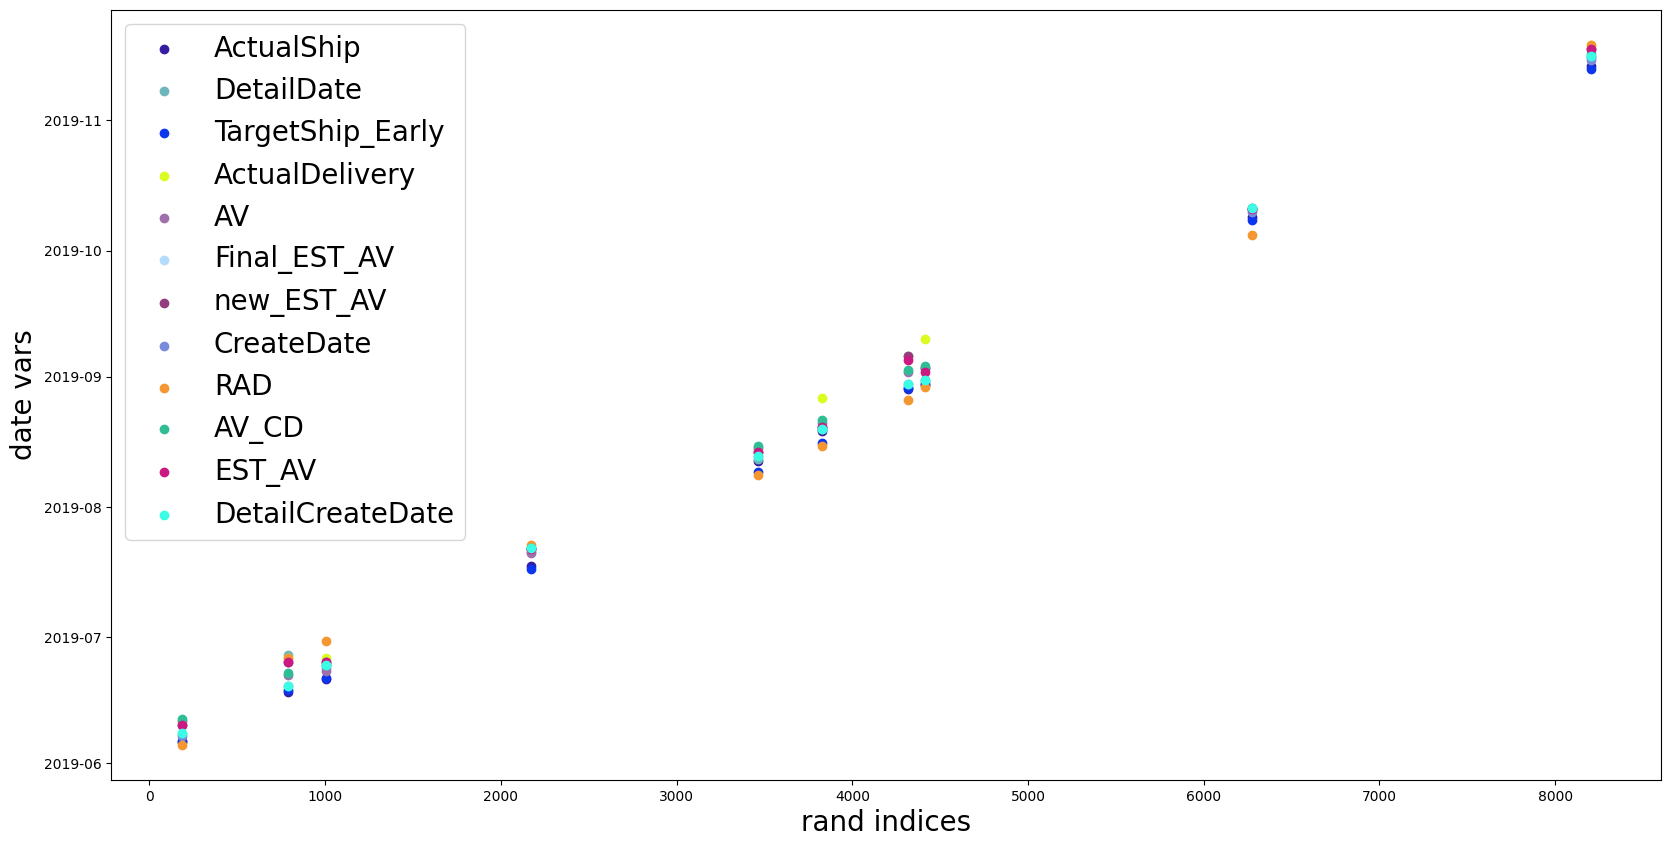

In [442]:
plt.figure(figsize = (20, 10))

plt.xlabel('rand indices', fontsize=20) 
plt.ylabel("date vars", fontsize=20)
#plt.scatter(rand_ind, fulldata[dateonly_cols[0]].iloc[ rand_ind], label = dateonly_cols[0], 
#         color='skyblue')
#plt.scatter(rand_ind, fulldata[dateonly_cols[1]].iloc[ rand_ind], label = dateonly_cols[1], 
#         color='orange')

no_of_colors=len(dateonly_cols)
np.random.seed(14)
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]

for col, x in zip(dateonly_cols2, range(len(dateonly_cols2))):
    plt.scatter(rand_ind, fulldata[col].iloc[ rand_ind], label = col, color=colors[x])
    
plt.legend(fontsize=20)

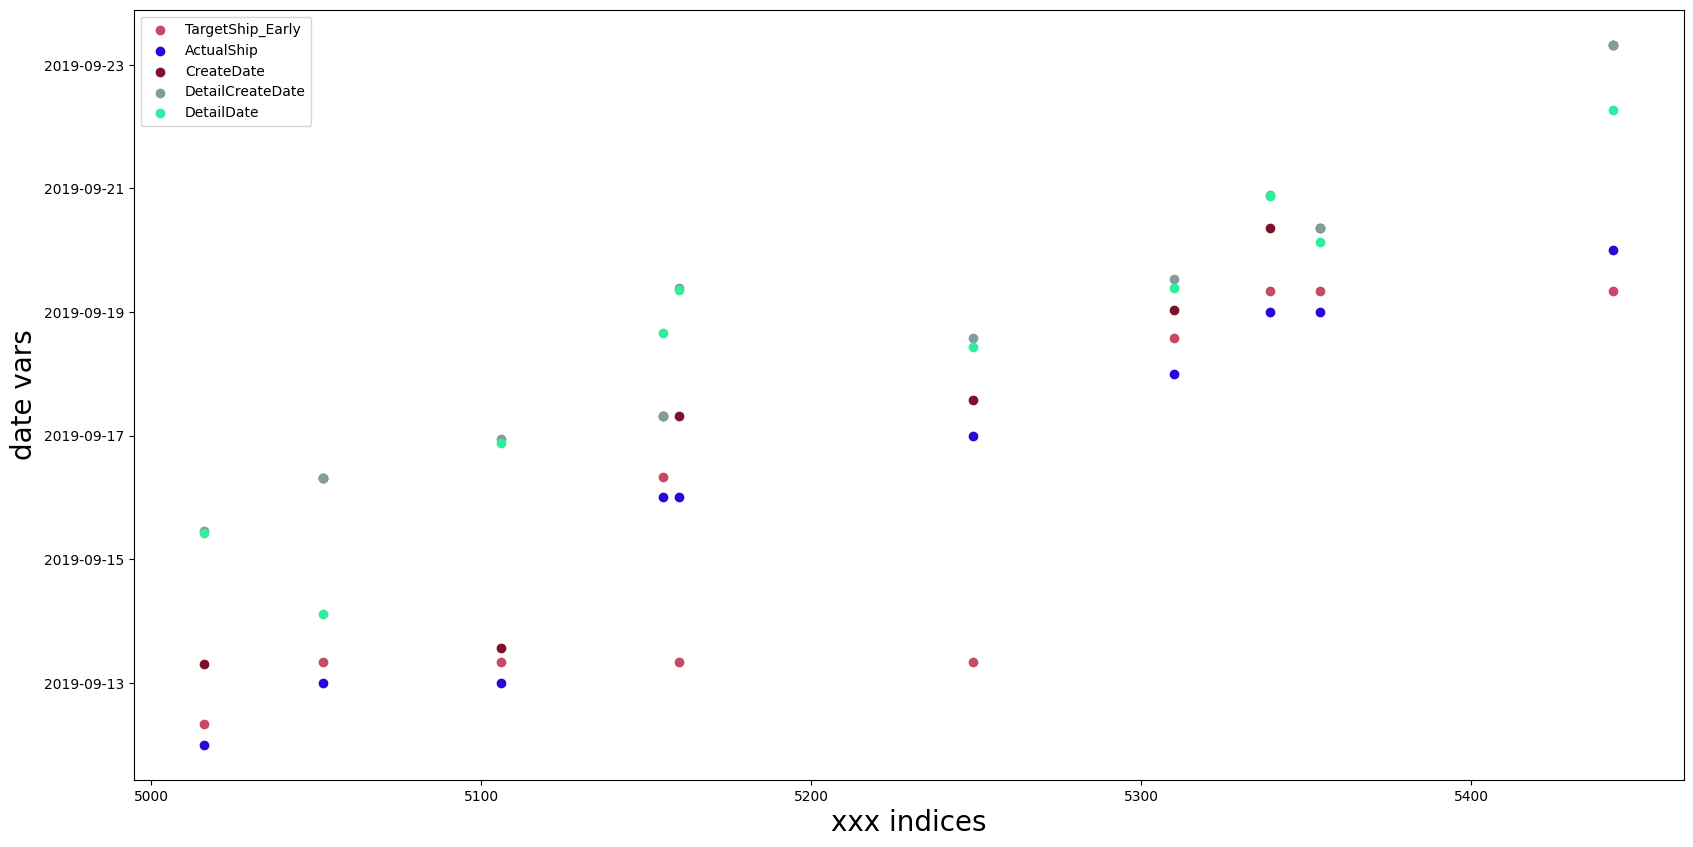

In [498]:
dateonly_cols2 = list(filter(lambda a: a not in ['Goal2', 'Goal'] , dateonly_cols)) #, 'ActualShip', 'TargetShip_Early', 
                                                # 'RAD']
cols2 = ['ActualDelivery', 'AV', 'Final_EST_AV',  'new_EST_AV', 'EST_AV', 'RAD']
cols3 = [ 'TargetShip_Early', 'ActualShip', 'CreateDate', 'DetailCreateDate', 'DetailDate']

rand_ind2 =  np.random.choice(fulldata.iloc[5000:5500].index, size=10, replace=False)

chosen_ind = rand_ind2 #PUT INDEXES HERE. # range(5230,5240)  #rand_ind

column_list = cols3  #PUT COLUMN LIST HERE ONLY

plt.figure(figsize = (20, 10))

plt.xlabel('xxx indices', fontsize=20) 
plt.ylabel("date vars", fontsize=20)


no_of_colors=len(column_list)
np.random.seed(77)
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]

for col, x in zip(column_list, range(len(column_list))):
    plt.scatter(chosen_ind, fulldata[col].iloc[chosen_ind], label = col, color=colors[x])
    
plt.legend(fontsize=10)
plt.show()

In [298]:
fulldata['target'].iloc[chosen_ind]

5230    positive
5231    positive
5232    negative
5233    positive
5234    positive
5235    negative
5236    positive
5237    positive
5238    positive
5239    positive
Name: target, dtype: object

## datetime var conclusions:
-ActualDelivery is as sounds. 
-Goal is long before the rest   
-Goal2 is less far before the rest    
-ActualShip must be date shipped. almost always first, except sometimes TargetShip_Early is before it      
-TargetShip_Early may be a targeted early ship out date      
-RAD is often last. means Required Availability Date. Usually this OR ActualDelivery is last    
-DetailDate is towards the beginning. idk meaning     
-CreateDate ???     
-DetailCreateDate- usually (97%) after CreateDate     
-AV = Arrival i guess. AV_CD usually (90%) same day as AV, but gives a specific time whereas AV is always 12 AM. idk meaning. cross-dock? How is Arrival different than (Actual)Delivery?     
    --google says arrival = reaching final port, whereas delivery is actually reaching the the destination/consignee     
-AV_CD gives same date as AV but adds specific time    
-AV and AV_CD sometimes before/sometiems after EST_AVs    
-EST_AV, new_EST_AV, final_EST_AV must be estimated arrival datetimes. Sometimes they're the same   
    -EST_AV always <= new_EST_AV. usually (91.5%) EST_AV = new_EST_AV    
    -new_EST_AV = Final_EST_AV almost always (98.7%)     
         
-Suspicion: some of the date variables, esp. ActualDelivery, could predict exactly the target, so I probly need to drop them, but this doesnt seem to be true so ??????

In [456]:
target_v_actual_ship = (fulldata['TargetShip_Early'] - fulldata['ActualShip'])/np.timedelta64(1, 'D') #.dt.days

#target_v_actual_ship

0       -4.666667
1        0.333333
2        3.333333
3        5.208333
4       -1.000000
5        0.000000
6        0.000000
7        0.500000
8        0.500000
9        0.500000
10       0.500000
11       0.333333
12       0.000000
13       0.500000
14       0.333333
15       0.333333
16       0.500000
17       0.333333
18       0.500000
19       0.333333
20       0.333333
21       0.333333
22       0.333333
23       0.333333
24       0.333333
25       0.333333
26       0.333333
27       0.500000
28       0.333333
29       0.500000
30       0.333333
31       0.333333
32       0.333333
33       0.458333
34       0.333333
35       0.333333
36       0.333333
37       0.333333
38       0.333333
39       0.333333
40       0.333333
41       0.333333
42       0.333333
43       0.333333
44       0.583333
45       0.333333
46       0.333333
47       0.333333
48       0.333333
49       0.333333
50       0.333333
51       0.333333
52       0.333333
53       0.333333
54       0.333333
55       0

In [ ]:
def dateCatVarMaker(df, col):
    df[col]

In [458]:
df['ActualShip' + 'DOW'] = df['ActualShip'].dt.dayofweek

,ActualShip,KEY_LOAD_TRACKING,CreateDate,ActualDelivery,Carrier,DetailCreateDate,DetailDate,AV_CD,AV,PRO,ActualTransitTime,DeliveryDays,ServiceDays,Weight,CustomerDistance,RAD,DestName,Goal,Goal2,InvoiceCost,Mileage,Quantity,TargetShip_Early,ActualDeliveryTime,ActualShipTime,AVTime,EST_AV,holiday_flag,new_EST_AV,Final_EST_AV,target_numerical,ConsigneeCity_ABINGDON,ConsigneeCity_ACWORTH,ConsigneeCity_ALACHUA,ConsigneeCity_ALAMEDA,ConsigneeCity_ALBANY,ConsigneeCity_ALBUQUERQUE,ConsigneeCity_ALEXANDRIA,ConsigneeCity_ALLENTOWN,ConsigneeCity_AMARILLO,ConsigneeCity_AMITYVILLE,ConsigneeCity_AMSTERDAM,ConsigneeCity_ANAHEIM,ConsigneeCity_ANDERSON,ConsigneeCity_ANOKA,ConsigneeCity_APPLE VALLEY,ConsigneeCity_APPLETON,ConsigneeCity_ARDMORE,ConsigneeCity_ASHBURN,ConsigneeCity_ASHLEY,ConsigneeCity_ATHENS,ConsigneeCity_ATLANTA,ConsigneeCity_AUBURN,ConsigneeCity_AURORA,ConsigneeCity_AUSTIN,ConsigneeCity_AVON,ConsigneeCity_Alachua,ConsigneeCity_Albany,ConsigneeCity_Apple Valley,ConsigneeCity_Ardmore,ConsigneeCity_Ashley,ConsigneeCity_Athens,ConsigneeCity_Atlanta,ConsigneeCity_Aurora,ConsigneeCity_BALLWIN,ConsigneeCity_BALTIMORE,ConsigneeCity_BARTLETT,ConsigneeCity_BEAUMONT,ConsigneeCity_BEAVER DAM,ConsigneeCity_BEDFORD,ConsigneeCity_BEDFORD-STUYVESANT,ConsigneeCity_BEECH ISLAND,ConsigneeCity_BELLEFONTAINE,ConsigneeCity_BELLEVUE,ConsigneeCity_BELLPORT,ConsigneeCity_BENTONVILLE,ConsigneeCity_BERNARDSVILLE,ConsigneeCity_BESSEMER,ConsigneeCity_BETHEL,ConsigneeCity_BETHESDA,ConsigneeCity_BETHLEHEM,ConsigneeCity_BETHPAGE,ConsigneeCity_BILLERICA,ConsigneeCity_BIRMINGHAM,ConsigneeCity_BLACK MOUNTAIN,ConsigneeCity_BLOOMINGTON,ConsigneeCity_BLUE ANCHOR,ConsigneeCity_BLUFFTON,ConsigneeCity_BOCA RATON,ConsigneeCity_BOHEMIA,ConsigneeCity_BOLINGBROOK,ConsigneeCity_BOONE,ConsigneeCity_BORDENTOWN,ConsigneeCity_BOSTON,ConsigneeCity_BOTHELL,ConsigneeCity_BRADENTON,ConsigneeCity_BRATTLEBORO,ConsigneeCity_BREA,ConsigneeCity_BREINIGSVILLE,ConsigneeCity_BRENTWOOD,ConsigneeCity_BRIDGEVILLE,ConsigneeCity_BROAD RUN,ConsigneeCity_BROOK PARK,ConsigneeCity_BROOKHAVEN,ConsigneeCity_BROOKLYN,ConsigneeCity_BROOKLYN CENTER,ConsigneeCity_BROOKLYN PARK,ConsigneeCity_BROOKS,ConsigneeCity_BROOKSHIRE,ConsigneeCity_BROOKSVILLE,ConsigneeCity_BROWNSTOWN,ConsigneeCity_BROWNSTOWN TOWNSHIP,ConsigneeCity_BRUNSWICK,ConsigneeCity_BUCKEYE,ConsigneeCity_BUENA,ConsigneeCity_BUFFALO,ConsigneeCity_BUFFALO GROVE,ConsigneeCity_BUFORD,ConsigneeCity_BURLINGTON,ConsigneeCity_BURNABY,ConsigneeCity_BUTNER,ConsigneeCity_BYRON,ConsigneeCity_BYRON CENTER,ConsigneeCity_Bartlett,ConsigneeCity_Bessemer,ConsigneeCity_Bethel,ConsigneeCity_Bethlehem,ConsigneeCity_Birmingham,ConsigneeCity_Bloomington,ConsigneeCity_Bluffton,ConsigneeCity_Boone,ConsigneeCity_Bordentown,ConsigneeCity_Brattleboro,ConsigneeCity_Brea,ConsigneeCity_Bridgewater Township,ConsigneeCity_Brook Park,ConsigneeCity_Brooklyn,ConsigneeCity_Brooksville,ConsigneeCity_Buckeye,ConsigneeCity_Byron Center,ConsigneeCity_CAGUAS,ConsigneeCity_CAMARILLO,ConsigneeCity_CAMBRIDGE,ConsigneeCity_CAMDEN,ConsigneeCity_CANTON,ConsigneeCity_CAPITOL HEIGHTS,ConsigneeCity_CAREY,ConsigneeCity_CARLISLE,ConsigneeCity_CARLSTADT,ConsigneeCity_CAROL STREAM,ConsigneeCity_CARPINTERIA,ConsigneeCity_CARROLLTON,ConsigneeCity_CEDAR FALLS,ConsigneeCity_CELINA,ConsigneeCity_CHAMBERSBURG,ConsigneeCity_CHANDLER,ConsigneeCity_CHARITON,ConsigneeCity_CHARLESTOWN,ConsigneeCity_CHARLOTTE,ConsigneeCity_CHATTANOOGA,ConsigneeCity_CHEHALIS,ConsigneeCity_CHEMUNG,ConsigneeCity_CHESAPEAKE,ConsigneeCity_CHESTER,ConsigneeCity_CHICAGO,ConsigneeCity_CHINO,ConsigneeCity_CINCINNATI,ConsigneeCity_CLACKAMAS,ConsigneeCity_CLAYTON,ConsigneeCity_CLEAR LAKE,ConsigneeCity_CLEARWATER,ConsigneeCity_CLEVELAND,ConsigneeCity_CLIFTON PARK,ConsigneeCity_CLINTON,ConsigneeCity_COCKEYSVILLE,ConsigneeCity_COCONUT CREEK,ConsigneeCity_COLDWATER,ConsigneeCity_COLLEGE PARK,ConsigneeCity_COLLEGE POINT,ConsigneeCity_COLLEYVILLE,ConsigneeCity_COLLIERVILLE,ConsigneeCity_COLORADO SPRINGS,ConsigneeCity_COLUMBIA,ConsigneeCity

In [470]:
type(fulldata['ActualShip'].dt.dayofweek.astype(str).iloc[5])

str

In [356]:
sum(fulldata.DetailCreateDate.dt.day >= fulldata.CreateDate.dt.day)/len(fulldata)

0.9697461347585417

In [431]:
(fulldata.CreateDate[23].dt.dayofyear)

23    155
23    338
Name: CreateDate, dtype: int64

In [474]:
(fulldata.Mileage).corr( fulldata.CustomerDistance) # - fulldata.CreateDate.dt.month)

0.9998570900839453

In [434]:
matrix = fulldata[datetime_cols].corr()
print(matrix)


Empty DataFrame
Columns: []
Index: []


C:\Users\Zachary Ohl\AppData\Local\Temp\ipykernel_13500\2196073326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = fulldata[datetime_cols].corr()


In [282]:
fulldata.target_numerical.value_counts()

1    8326
0    2152
Name: target_numerical, dtype: int64

### test equality
LOCATIONS:
ConsigneeCity = DestCity : 97%
ConsigneeZip = DestZip : 
DetailCity = DestCity : 13%
OriginCity = ShipperCity : 99%

DATES
new_EST_AV = Final_EST_AV : 98%
new_EST_AV = EST_AV : 91%
AV = EST_AV : 46%

In [391]:
sum(fulldata.OriginCity == fulldata.ShipperCity)/len(fulldata)

0.9904561939301394

In [392]:
fulldata.OriginCtry.value_counts()

USA       10424
CAN          37
AUS          12
CANADA        4
PRI           1
Name: OriginCtry, dtype: int64

In [ ]:
#google colab split cell: Ctrl + M + -

In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

object            30
datetime64[ns]    17
float64            7
int64              6
bool               1
dtype: int64

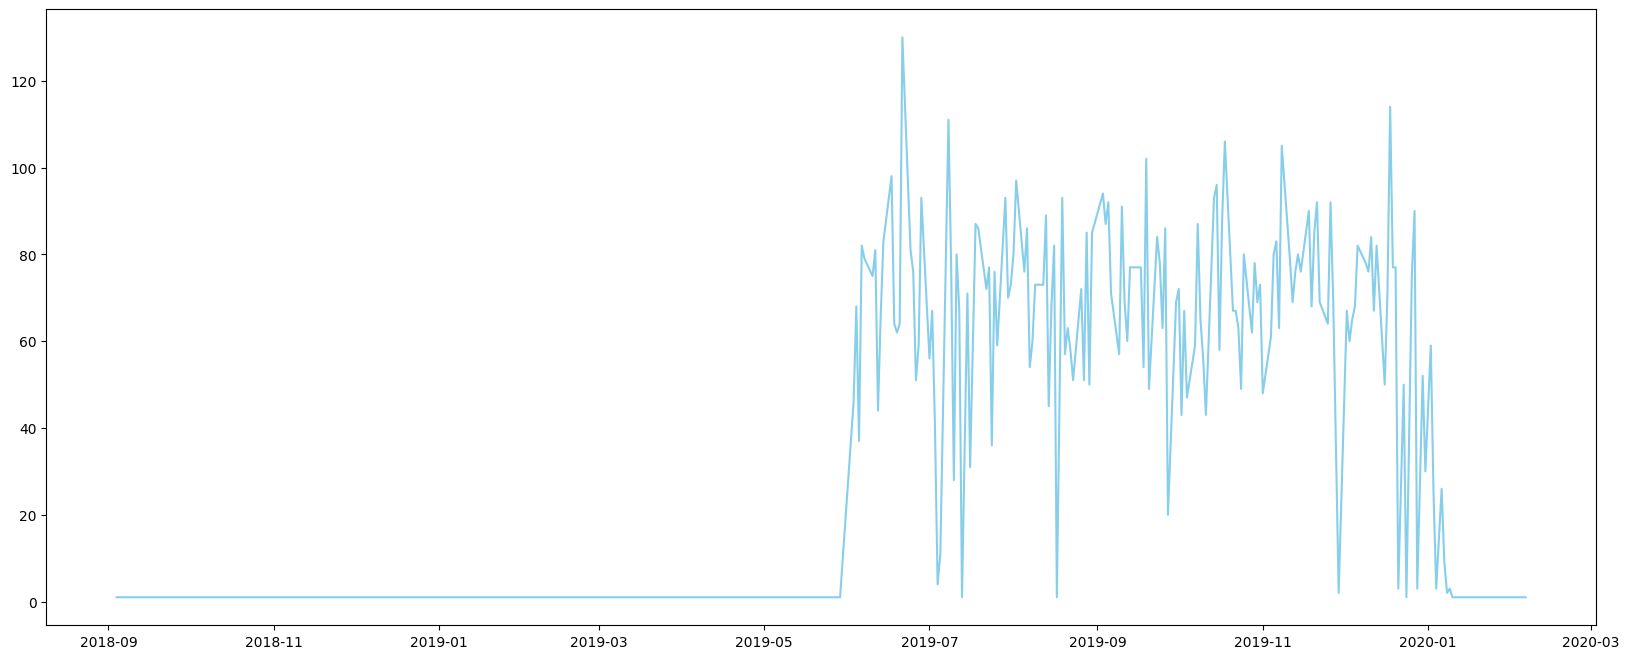

In [82]:
target_counts = fulldata.groupby(['ActualShip']).agg({'target_numerical' : 'count'})
plt.figure(figsize = (20, 8))
plt.plot(target_counts,  color='skyblue')

In [210]:
target_counts.target_numerical >10

,target_numerical
ActualShip,
2018-09-04,1
2019-02-06,1
2019-03-04,1
2019-05-10,1
2019-05-17,1
2019-05-28,1
2019-05-29,1
2019-06-03,46
2019-06-04,68


In [ ]:
dateonly_cols = list(set(datetime_cols).difference(timeonly_cols))


### Function for finding percent late by column category
#### use this for making EDA plots

In [476]:
#Find percent of time target reached for each category of any categorical variable
#df = dateframe name
#col = column name as string
#min => pass minimum number of observations you want in each category (percentage of on-time
  # shipments doesn't mean much if there were only 1 or 2 shipments in that category)
def target_percent_agg(df, col_name, min):
    sum_of_target = df.groupby([col_name]).agg({'target_numerical' : 'sum'})
    count_of_target = df.groupby([col_name]).agg({'target_numerical' : 'count'})   
    return (sum_of_target/count_of_target)[count_of_target.target_numerical >= min]
    

In [92]:
ontime_percent_by_ActualShip = fulldata.groupby(['ActualShip']).\
agg({'target_numerical' : 'sum'})/fulldata.groupby(['ActualShip']).\
agg({'target_numerical' : 'count'})
ontime_percent_by_ActualShip == target_percent_agg('ActualShip')

,target_numerical
ActualShip,
2018-09-04,True
2019-02-06,True
2019-03-04,True
2019-05-10,True
2019-05-17,True
2019-05-28,True
2019-05-29,True
2019-06-03,True
2019-06-04,True


In [234]:
target_percent_agg('ShipperState', min=100).

SyntaxError: invalid syntax (3685079306.py, line 1)

#### make more plots like this for other date vars

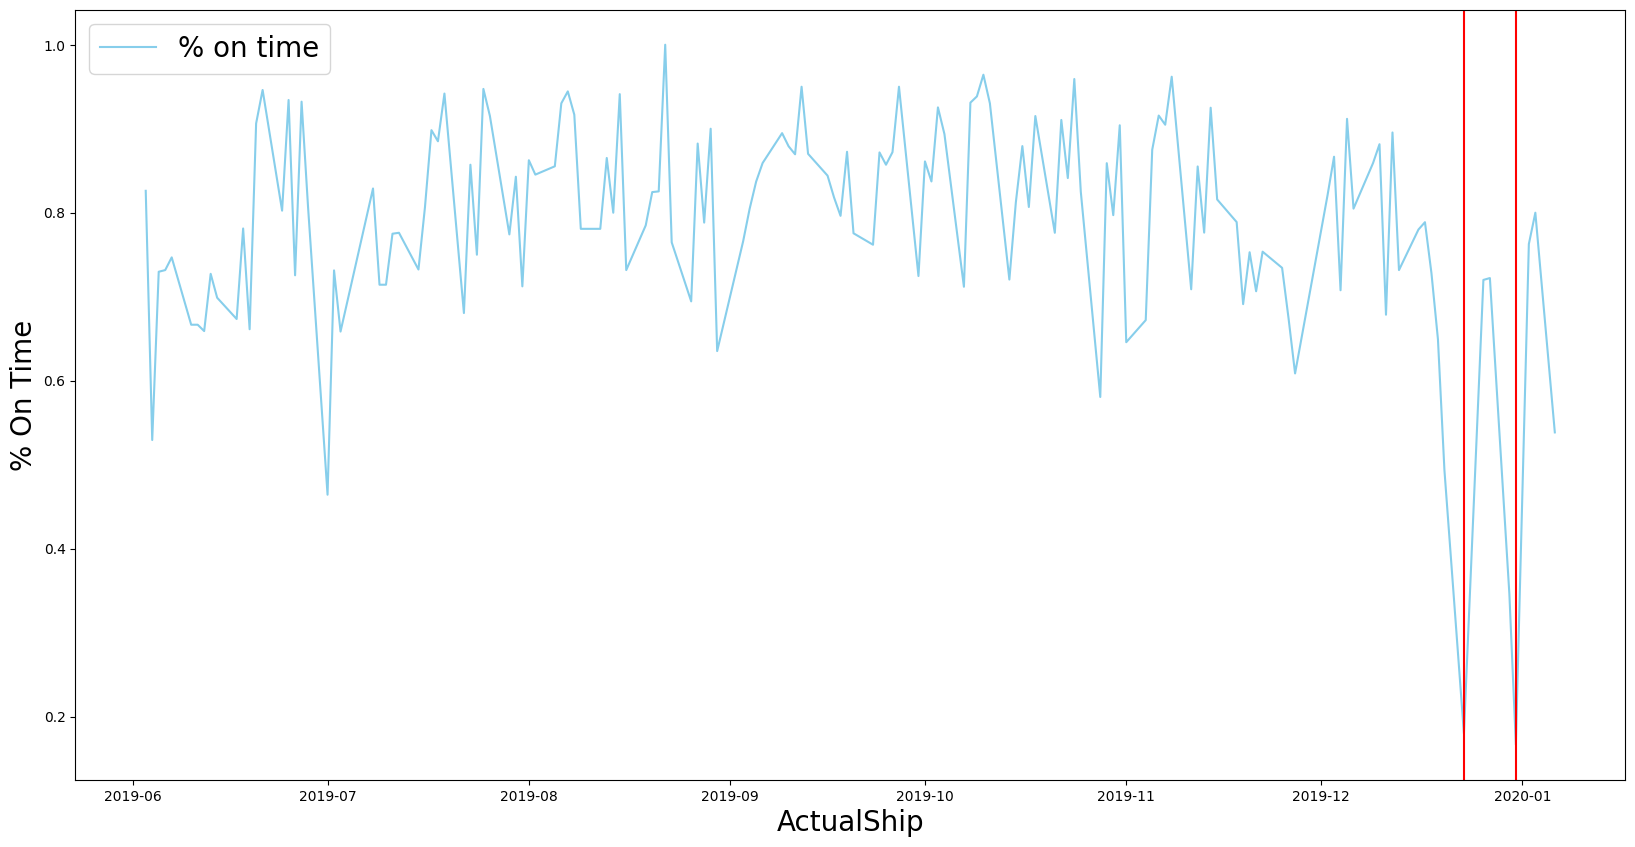

In [494]:
plt.figure(figsize = (20, 10))
columnname = 'ActualShip'
plt.xlabel(columnname, fontsize=20) 
plt.ylabel("% On Time", fontsize=20)
plt.plot(target_percent_agg(fulldata, columnname, min=15), 
         label = '% on time', color='skyblue')
plt.legend(fontsize=20)
plt.axvline(dt.datetime(2019, 12, 31), color='red')  #NYE                    #last days before holiday
plt.axvline(dt.datetime(2019, 12, 23), color='red')  #2 days before xmas??   #last days before holiday
#plt.axvline(dt.datetime(2019, 7, 1), color='red')  #

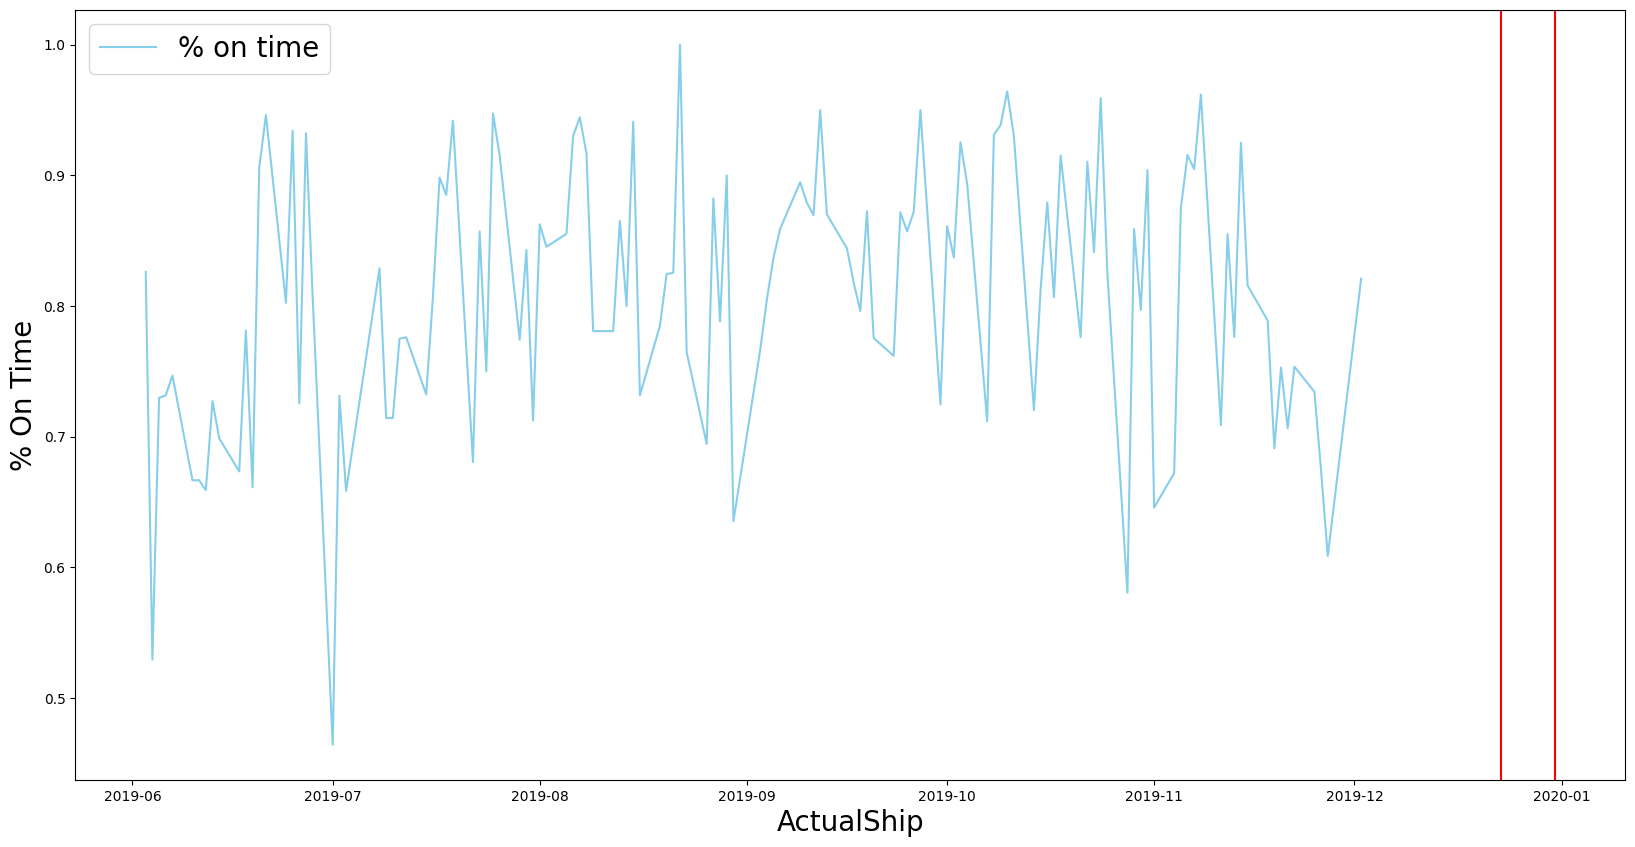

In [502]:
plt.figure(figsize = (20, 10))
columnname = 'ActualShip'
plt.xlabel(columnname, fontsize=20) 
plt.ylabel("% On Time", fontsize=20)
plt.plot(target_percent_agg(fulldata[:first_test_ind], columnname, min=15), 
         label = '% on time', color='skyblue')
plt.legend(fontsize=20)
plt.axvline(dt.datetime(2019, 12, 31), color='red')  #NYE                    #last days before holiday
plt.axvline(dt.datetime(2019, 12, 23), color='red')  #2 days before xmas??   #last days before holiday
#plt.axvline(dt.datetime(2019, 7, 1), color='red')  #

In [80]:
[1,2,3,4,5,6,7,8,9,10][2:-2]

[3, 4, 5, 6, 7, 8]

In [245]:
dict(target_percent_agg(columnname, min=50))

{'target_numerical': ShipperState
 CA    0.916107
 CO    0.855263
 FL    0.821429
 IL    0.548822
 MA    0.803030
 MI    0.558824
 MN    0.969231
 MO    0.637931
 NJ    0.958937
 NY    0.793103
 OH    0.843137
 PA    0.919355
 SC    0.793778
 TN    0.731801
 TX    0.849057
 VA    0.897527
 Name: target_numerical, dtype: float64}

#### make more plots like this for other date vars

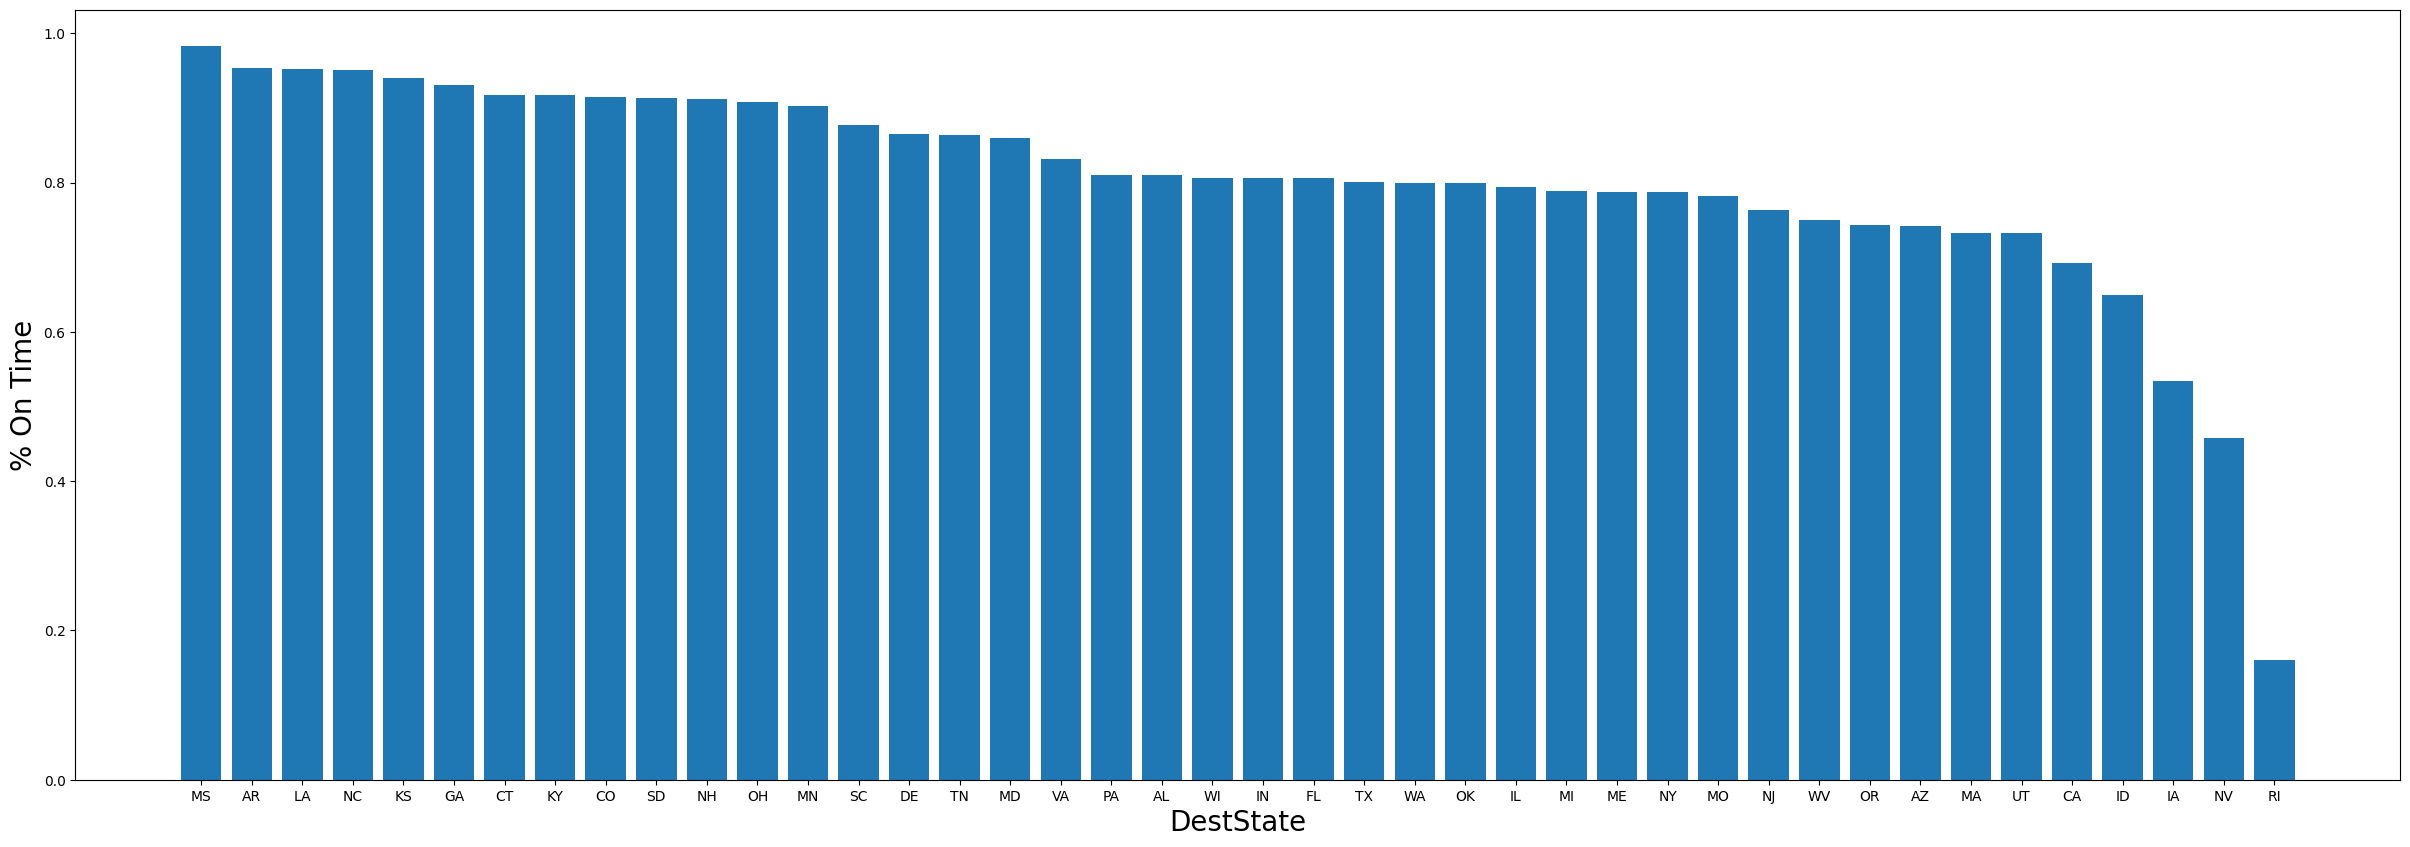

In [479]:
plt.figure(figsize = (30, 10))
columnname = 'DestState'
plt.xlabel(columnname, fontsize=20) 
plt.ylabel("% On Time", fontsize=20)
plot_data = target_percent_agg(fulldata2, columnname, min=15).\
  sort_values(by=['target_numerical'], axis=0, ascending=False)
plt.bar(x = list(plot_data.index), height = list(plot_data.target_numerical) )
plt.show()
#

In [272]:
target_percent_agg(columnname, min=50).sort_values(by=['target_numerical'], axis=0, ascending=False)


,target_numerical
ShipperState,
IL,0.548822
MI,0.558824
MO,0.637931
TN,0.731801
NY,0.793103
SC,0.793778
MA,0.803030
FL,0.821429
OH,0.843137


target_numerical    ShipperState
CA    0.916107
CO    0.855263
FL    0.821429
IL    0.548822
MA    0.803030
MI    0.558824
MN    0.969231
MO    0.637931
NJ    0.958937
NY    0.793103
OH    0.843137
PA    0.919355
SC    0.793778
TN    0.731801
TX    0.849057
VA    0.897527
Name: target_numerical, dtype: float64
dtype: object

In [39]:
fulldata.ConsigneeCity.apply(str.lower).head()

0              rosenberg
1            chattanooga
2    south san francisco
3                 mclean
4            saint louis
Name: ConsigneeCity, dtype: object

In [40]:
fulldata.DestCity.apply(str.lower).head()

0            chattanooga
1            chattanooga
2    south san francisco
3                 mclean
4              st. louis
Name: DestCity, dtype: object

In [220]:
fulldata2.dtypes.value_counts()

object            30
datetime64[ns]    17
float64            7
int64              6
bool               1
dtype: int64

In [221]:
fulldata.select_dtypes(['int64', 'float64']).head()

,KEY_LOAD_TRACKING,Carrier,PRO,ActualTransitTime,DeliveryDays,ServiceDays,Weight,CustomerDistance,DestName,InvoiceCost,Mileage,Quantity,target_numerical
0,3812945156,4,3812945156,1.87,1.0,2,2500.0,16.4,610,445.470000,16.400000,1.0,1
1,36700475761,4,36700475761,1.78,1.0,1,2400.0,722.4,2436,562.230000,722.400024,1.0,0
2,40356094,0,40356094,7.87,1.0,4,210.0,2139.6,1486,244.440000,2139.600098,1.0,0
3,99957685869,4,99957685869,4.52,1.0,2,290.0,690.6,628,285.940000,694.799988,1.0,1
4,4265894113,3,4265894113,5.50,1.0,0,400.0,0.0,3263,184.190002,NaN,3.0,0


In [222]:
numeric_cols = ['ActualTransitTime', 'DeliveryDays', 'ServiceDays', 'Weight', 'CustomerDistance', 
                'InvoiceCost', 'Mileage', 'Quantity']
#not KEY_LOAD_TRACKING, Carrier, PRO
# ??? not DestName

### pairs plot

In [ ]:
numeric_cols = [ 'DeliveryDays', 'ServiceDays', 'Weight', 
                 'CustomerDistance', 'InvoiceCost', 'Quantity']

In [ ]:
sns.set_theme(context='notebook', style='whitegrid', palette= 'Set2', font='monospace', 
              font_scale=1.5)
sns.pairplot(train2[numeric_cols]) 

In [ ]:
fulldata2

In [305]:
ss=fulldata[dateonly_cols].iloc[rand_ind]
ss.head()

,ActualShip,DetailDate,TargetShip_Early,ActualDelivery,AV,Final_EST_AV,Goal2,new_EST_AV,CreateDate,RAD,AV_CD,EST_AV,DetailCreateDate,Goal
4412,2019-08-30,2019-08-30 15:55:00,2019-08-30 08:00:00,2019-09-10,2019-09-03,2019-09-03,2019-07-31 23:59:59.999,2019-09-03,2019-08-31 05:05:00,2019-08-29 11:54:00,2019-09-03 13:37:00,2019-09-02,2019-08-31 05:05:00,2019-05-01
788,2019-06-18,2019-06-26 17:00:00,2019-06-18 08:00:00,2019-06-26,2019-06-22,2019-06-25,2019-05-31 23:59:59.999,2019-06-25,2019-06-19 07:06:00,2019-06-26 00:00:00,2019-06-22 09:26:00,2019-06-25,2019-06-19 07:07:00,2019-03-01
2173,2019-07-18,2019-07-21 04:58:00,2019-07-17 08:00:00,2019-07-22,2019-07-21,2019-07-22,2019-06-30 23:59:59.999,2019-07-22,2019-07-22 07:06:00,2019-07-23 00:00:00,2019-07-22 07:06:00,2019-07-22,2019-07-22 07:06:00,2019-04-01
8202,2019-11-14,2019-11-16 04:36:00,2019-11-13 08:00:00,2019-11-19,2019-11-16,2019-11-18,2019-10-31 23:59:59.999,2019-11-18,2019-11-15 07:10:00,2019-11-19 00:00:00,2019-11-16 16:56:00,2019-11-18,2019-11-16 05:01:00,2019-08-01
6273,2019-10-09,2019-10-11 03:53:00,2019-10-08 08:00:00,2019-10-11,2019-10-11,2019-10-11,2019-09-30 23:59:59.999,2019-10-11,2019-10-10 07:22:00,2019-10-04 16:23:00,2019-10-11 04:36:00,2019-10-11,2019-10-11 04:36:00,2019-07-01


In [309]:
s = pd.Series([1, 2, 3], dtype="Int64")
pd.to_numeric(ss.ActualShip, downcast="integer")/10**11

4412    15671232.0
788     15608160.0
2173    15634080.0
8202    15736896.0
6273    15705792.0
183     15597792.0
1003    15610752.0
4314    15670368.0
3465    15655680.0
3825    15661728.0
Name: ActualShip, dtype: float64

In [314]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score #the usual MSE and r^2 measures
from sklearn.impute import KNNImputer


In [342]:
fulldata2 = fulldata.copy()
fulldata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10478 entries, 0 to 1477
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ActualShip             10478 non-null  datetime64[ns]
 1   KEY_LOAD_TRACKING      10478 non-null  int64         
 2   CreateDate             10478 non-null  datetime64[ns]
 3   ActualDelivery         10475 non-null  datetime64[ns]
 4   Carrier                10478 non-null  int64         
 5   ConsigneeCity          10478 non-null  object        
 6   ConsigneeCountry       94 non-null     object        
 7   ConsigneeZip           10478 non-null  object        
 8   DetailCity             10406 non-null  object        
 9   DetailState            10406 non-null  object        
 10  DetailCode             10478 non-null  object        
 11  DetailCodeDescription  10478 non-null  object        
 12  DetailCreateDate       10478 non-null  datetime64[ns]
 13  De

In [343]:
fulldata2 = fulldata2.drop(columns=['target', 'ConsigneeCountry', 'ShipperCountry']) #cCountry is all USA or mostly missing

In [344]:
for col in datetime_cols:
    fulldata2[col] = pd.to_numeric(fulldata2[col], downcast="integer")/10**11

In [345]:
df = pd.get_dummies(fulldata2,  drop_first = True)
df.shape
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10478 entries, 0 to 1477
Columns: 6534 entries, ActualShip to Final_EST_AV_dow_Wednesday
dtypes: bool(1), float64(24), int64(6), uint8(6503)
memory usage: 67.7 MB


In [346]:
df_knn = df.copy()
knn = KNNImputer(n_neighbors=9, add_indicator=False)
knn.fit(df_knn)
df_knn = knn.transform(df_knn)
df_knn = pd.DataFrame(df_knn, columns = df.columns) #fit or trans removed col names, add them back in

In [347]:
X = df.loc[:, df.columns != 'target_numerical']   #Collection is the response
y = df['target_numerical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [348]:
regtree = tree.DecisionTreeRegressor()
regtree.fit(X = X_train, y = y_train)                fuck yjis

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train_pred = regtree.predict(X_train) 
y_test_pred = regtree.predict(X_test)

In [ ]:
#MSE on train set:
mean_squared_error(y_true = y_train, y_pred = y_train_pred)

In [ ]:
#MSE on test set:
mean_squared_error(y_true = y_test, y_pred = y_test_pred)
#

In [350]:
from geopy.geocoders import Nominatim
